# Import everything needed from the previous experiments

In [1]:

%run busi_augmentation_2.ipynb

Found 210 images and 211 masks in malignant folder


Processing malignant masks: 100%|███████████████████████████████████████████████████| 211/211 [00:00<00:00, 597.10it/s]


Found 133 images and 133 masks in normal folder


Processing normal masks: 100%|██████████████████████████████████████████████████████| 133/133 [00:00<00:00, 299.14it/s]


Found 437 images and 454 masks in benign folder


Processing benign masks: 100%|██████████████████████████████████████████████████████| 454/454 [00:00<00:00, 617.00it/s]


Combined 2 masks for malignant (53).png
Combined 2 masks for benign (100).png
Combined 2 masks for benign (163).png
Combined 2 masks for benign (173).png
Combined 2 masks for benign (181).png
Combined 3 masks for benign (195).png
Combined 2 masks for benign (25).png
Combined 2 masks for benign (315).png
Combined 2 masks for benign (346).png
Combined 2 masks for benign (4).png
Combined 2 masks for benign (424).png
Combined 2 masks for benign (54).png
Combined 2 masks for benign (58).png
Combined 2 masks for benign (83).png
Combined 2 masks for benign (92).png
Combined 2 masks for benign (93).png
Combined 2 masks for benign (98).png
Dataset shape: (780, 224, 224, 1)
Masks shape: (780, 224, 224, 1)
Labels shape: (780,)
Class distribution: Normal: 133, Benign: 437, Malignant: 210
Training set sizes: X_train: (546, 224, 224, 1), y_train: (546,), masks: (780, 224, 224, 1)
Augmented training set sizes: X_aug: (1758, 224, 224, 1), y_aug: (1758,), masks: (1758, 224, 224, 1)
Validation set sizes

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU, BatchNormalization, Conv2D, MaxPooling2D, Flatten,  Dropout, Activation
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf
from tensorflow.keras.datasets import mnist, cifar10
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

import seaborn as sns
import time

In [3]:
print(X_aug.shape)
print(y_aug.shape)
print(masks_aug.shape)

(1758, 224, 224, 1)
(1758,)
(1758, 224, 224, 1)


## Apply normalization on the dataset

In [4]:
# Train
X_train_aug = X_aug.astype("float32") / 255.0
masks_train_aug = masks_aug.astype("float32") / 255.0
y_train_aug = y_aug

# Test
X_test = X_test.astype("float32") / 255.0
masks_test = masks_test.astype("float32") / 255.0
y_test = y_test

# Validation
X_val = X_val.astype("float32") / 255.0
masks_val = masks_val.astype("float32") / 255.0
y_val = y_val




## 1. Model(early stopping, adam optimizer, sparse loss)

In [5]:
# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True,monitor='val_loss', verbose=1)

model_final_simple = Sequential([
        Input(shape=(224, 224, 1)),
        Conv2D(64, kernel_size=(5,5), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(128, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(256, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Flatten(),
        Dense(128, activation=(LeakyReLU(negative_slope=0.01))),
        Dropout(0.7),
        Dense(3, activation='softmax')
        ])

In [6]:
# Compile
model_final_simple.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train
model_final_simple.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)
        

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.3549 - loss: 1.2230 - val_accuracy: 0.5556 - val_loss: 1.0417
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.4562 - loss: 1.0415 - val_accuracy: 0.6068 - val_loss: 0.9061
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.5950 - loss: 0.8796 - val_accuracy: 0.5897 - val_loss: 0.7832
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.7065 - loss: 0.6940 - val_accuracy: 0.6496 - val_loss: 0.7367
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8049 - loss: 0.4999 - val_accuracy: 0.6838 - val_loss: 0.7321
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8561 - loss: 0.3674 - val_accuracy: 0.7179 - val_loss: 0.6321
Epoch 7/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.8720 - loss: 0.3289 - val_accuracy: 0.7521 - val_loss: 0.6872
Epoch 8/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.9295 - loss: 0.1872 - val_accuracy: 0.7607 - val_loss

## Evaluation metrics

### Precision , recall and f1

In [10]:
# Predict probabilities
y_test_probs = model_final_simple.predict(X_test)

# convert probabilities to predicted class labels
y_test_pred = np.argmax(y_test_probs, axis=1)


# Classification Report (includes precision, recall, f1-score per class)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, digits=4))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 311ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.8000    0.6000    0.6857        20
           1     0.7639    0.8333    0.7971        66
           2     0.7333    0.7097    0.7213        31

    accuracy                         0.7607       117
   macro avg     0.7657    0.7143    0.7347       117
weighted avg     0.7620    0.7607    0.7580       117



### F2

In [11]:
f2_score = fbeta_score(y_test, y_test_pred, beta=2, average='weighted')
print("F2-score:", round(f2_score, 4))

F2-score: 0.7589


### Heatmap confusion matrix

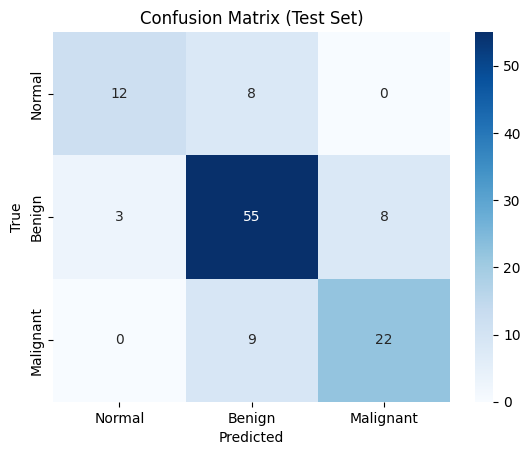

In [12]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Benign', 'Malignant'], yticklabels=['Normal', 'Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

## 2. Model(early stopping, adam optimizer, sparse loss,  ReduceLROnPlateau with aggressive decay parameters)

In [14]:
# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True,monitor='val_loss', verbose=1)

model_final_aggr_decay = Sequential([
        Input(shape=(224, 224, 1)),
        Conv2D(64, kernel_size=(5,5), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(128, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(256, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Flatten(),
        Dense(128, activation=(LeakyReLU(negative_slope=0.01))),
        Dropout(0.7),
        Dense(3, activation='softmax')
        ])

# Compile your model
model_final_aggr_decay.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
reduce_lr_2 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

# Train with callbacks
history = model_final_aggr_decay.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, reduce_lr_2]
)

Epoch 1/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.3623 - loss: 1.3834 - val_accuracy: 0.5641 - val_loss: 1.0733 - learning_rate: 0.0010
Epoch 2/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.3811 - loss: 1.0898 - val_accuracy: 0.5299 - val_loss: 1.0239 - learning_rate: 0.0010
Epoch 3/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.4465 - loss: 1.0535 - val_accuracy: 0.5812 - val_loss: 0.9345 - learning_rate: 0.0010
Epoch 4/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.4693 - loss: 1.0168 - val_accuracy: 0.5556 - val_loss: 0.9559 - learning_rate: 0.0010
Epoch 5/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5301 - loss: 0.9543
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
55/55 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.5455 - loss: 0.9505 - val_accuracy: 0.4103 - val_loss: 0.9944 - learning_rate: 0.0010
Epoch 6/30
55/55 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.6223 - loss: 0.8183 - val_accuracy: 0

In [16]:
# Predict probabilities
y_test_probs = model_final_aggr_decay.predict(X_test)

# convert probabilities to predicted class labels
y_test_pred = np.argmax(y_test_probs, axis=1)


# Classification Report (includes precision, recall, f1-score per class)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, digits=4))


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.7500    0.3000    0.4286        20
           1     0.7191    0.9697    0.8258        66
           2     0.9500    0.6129    0.7451        31

    accuracy                         0.7607       117
   macro avg     0.8064    0.6275    0.6665       117
weighted avg     0.7856    0.7607    0.7365       117



In [17]:
f2_score = fbeta_score(y_test, y_test_pred, beta=2, average='weighted')
print("F2-score:", round(f2_score, 4))

F2-score: 0.7444


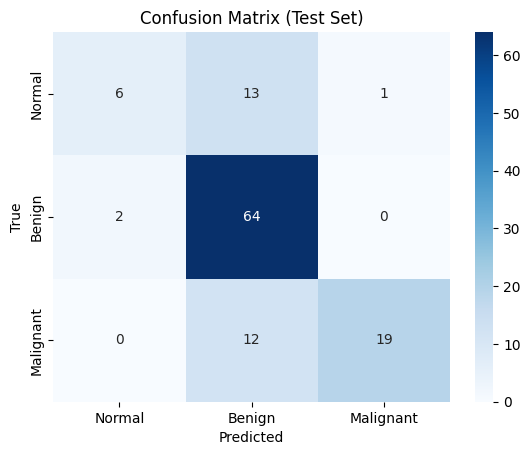

In [18]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Benign', 'Malignant'], yticklabels=['Normal', 'Benign', 'Malignant'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix (Test Set)')
plt.show()

Strengths of Model 2:

Very high recall for class 1 (malignant?): 96.97% (vs. 83.33% in Model 1)

High precision for class 2 (normal?): 95.00% (vs. 73.33%)

Weaknesses of Model 2:

Terrible recall for class 0 (benign?): 30.00% (vs. 60.00%)

Only 6/20 benign cases correctly classified

Lower F2-score overall: 0.7444 (vs. 0.7589)

Macro F1 is significantly worse (0.6665 vs. 0.7347), meaning model 2 is less balanced across classes

So *model 1 is the best, for now*.

In [ ]:
## 3. Model(early stopping, adam optimizer, sparse loss,  ReduceLROnPlateau with aggressive decay parameters)

In [20]:
# Early stopping
early_stop = EarlyStopping(patience=5, restore_best_weights=True,monitor='val_loss', verbose=1)

model_final_cos_1 = Sequential([
        Input(shape=(224, 224, 1)),
        Conv2D(64, kernel_size=(5,5), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(128, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Conv2D(256, kernel_size=(3,3), activation=(LeakyReLU(negative_slope=0.01))),
        MaxPooling2D(pool_size=(2, 2)),
    
        Flatten(),
        Dense(128, activation=(LeakyReLU(negative_slope=0.01))),
        Dropout(0.7),
        Dense(3, activation='softmax')
        ])

# Compile your model
model_final_cos_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
lr_schedule_1 = tf.keras.optimizers.schedules.CosineDecay(
    initial_learning_rate=1e-3,
    decay_steps=30 * len(X_train_aug),  # for 30 epochs
    alpha=1e-5
)

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule_1)

# Compile 
model_final.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
 
# Train
history = model_final.fit(
    X_train_aug, y_train_aug,
    validation_data=(X_val, y_val),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop]
)